# Hierarchical Clustering

_"One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram."_<sup>1</sup>

_"...we describe bottom-up or agglomerative clustering. This is the most common type of hierarchical clustering, and refers to the fact that a dendrogram (generally depicted as an upside-down tree; see Figure 10.9) is built starting from the leaves and combining clusters up to the trunk."_<sup>1</sup>

---
1. Intro to stats learning

__Notes__
- add info from pg.895 ML prop perspective

In [2]:
# needed for getting teh leave colors in the dendrogram
#!pip install scipy==1.6

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import os
from IPython.display import Image
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# set a random seed
np.random.seed(1)

# A list of centres of clusters
true_centres = [[-5, 0], [0, 0], [2, 3]]

points, clusters = make_blobs(
    n_samples=[18, 11, 16], # number of samples in each cluster
    centers=true_centres,     # where are the centres?
)


labelled_points = pd.DataFrame({'cluster': clusters,
                                'x1': points[:, 0],
                                'x2': points[:, 1]})

def clusters_plt(title):
    sns.scatterplot(x = 'x1', y = 'x2', hue="cluster", data = labelled_points, alpha=0.7, 
                    palette = CB_color_cycle[:3], legend=False)
    plt.title(title)
    plt.show()

# Data Example

_"In reality there are three distinct classes, shown in separate colors. However, we will treat these class labels as unknown and will seek to cluster the observations in order to discover the classes from the data."_ Intro to stats learning

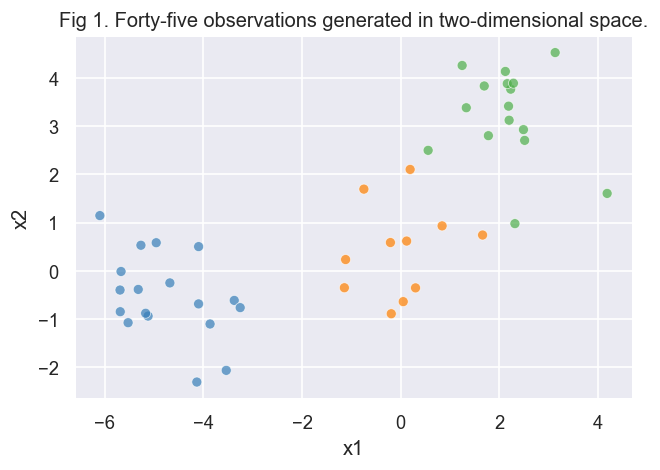

In [5]:
clusters_plt("Fig 1. Forty-five observations generated in two-dimensional space.")

_"each leaf of the dendrogram represents one of the 45 observations"_ 

_"However, as we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other. As we move higher up the tree, branches themselves fuse, either with leaves or other branches."_ 

_"The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other. On the other hand, observations that fuse later (near the top of the tree) can be quite different."_ 

---
Intro to stats learning

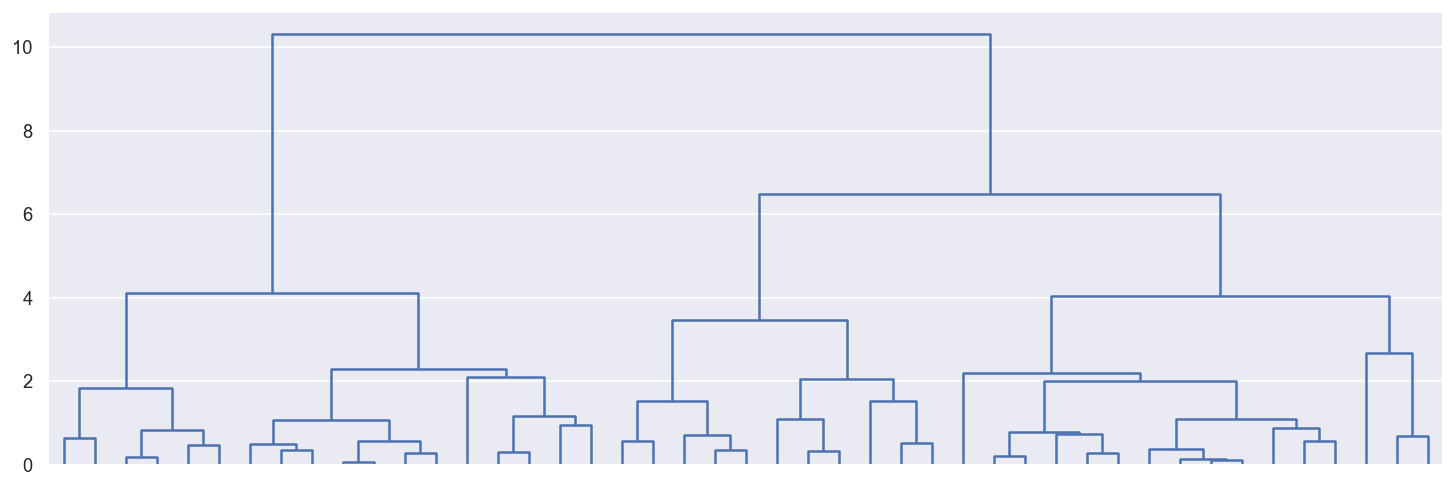

In [6]:
fig, axes = plt.subplots(figsize=(15,5))
cluster = hierarchy.dendrogram(hierarchy.complete(points), ax= axes, color_threshold=0)
axes.get_xaxis().set_ticks([])
plt.show()

Lets be more specific...

_"for any two observations, we can look for the point in the tree where branches containing those two observations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. Thus, observations that fuse at the very bottom of the tree are quite similar to each other, whereas observations that fuse close to the top of the tree will tend to be quite different."_

---
Intro to stats learning

In [7]:
def highlight_points(X, highlight, ax):
    for h in highlight:

        circle = plt.Circle((X[h,0]+0.1, X[h,1]+0.1), 0.15, color='r',fill=False)
        ax.add_patch(circle)


def numbered_scatter(X, ax=None, color_dict={}, title=None, highlight=None):
    
    if ax:
        plt.sca(ax)
    else:
        sns.set(rc={"figure.figsize":(10,5)})
        
    if not color_dict:
        for i in range(len(X)):
            color_dict[i]="purple"

    ax = sns.scatterplot(x=X[:,0], y=X[:,1], alpha=0)
    
    if title:
        ax.set(title=title)
    # label points on the plot
    for i, [x, y] in enumerate(zip(X[:,0], X[:,1])):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label
        y = y, # y-coordinate position of data label
        s = "{:.0f}".format(i), # data label, formatted to ignore decimals
        color = color_dict[i]) # set colour
        
    if highlight:
        highlight_points(X, highlight, ax)

def heir_scat_plot(linkage, X, threshold=0, highlight=None):
    #sns.set_theme(style = "whitegrid") 
    links_list = ["Complete", "Average", "Single"]
    if linkage not in links_list:
        raise NameError("linkage needs to be in: " +str(links_list))
    
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,18))
    
    plt.suptitle(linkage+" Linkage")
    
    # heirarchy plot
    plt.sca(ax1)
    if linkage == "Complete":
        links = hierarchy.complete(X)
    elif linkage == "Average":
        links = hierarchy.average(X)
    elif linkage == "Single":
        links = hierarchy.single(X)
    hierarchy.set_link_color_palette(CB_color_cycle)
    cluster = hierarchy.dendrogram(links, color_threshold=threshold)
    
    if threshold:
        plt.hlines(threshold, xmin=0., xmax=pd.DataFrame(cluster['icoord']).max().max(), colors ='k', linestyles = 'dashed')
    
    if highlight:
        ax_txt_labels = ax1.get_xticklabels()
        for label in ax_txt_labels:
            if int(label.get_text()) in highlight:
                label.set_fontweight("bold")
                label.set_fontsize(label.get_fontsize()*2)
    

    plt.xticks(rotation = 0)
    


    numbered_scatter(X, ax2, dict(zip(cluster['leaves'], cluster['leaves_color_list'])), highlight=highlight)

    plt.show()

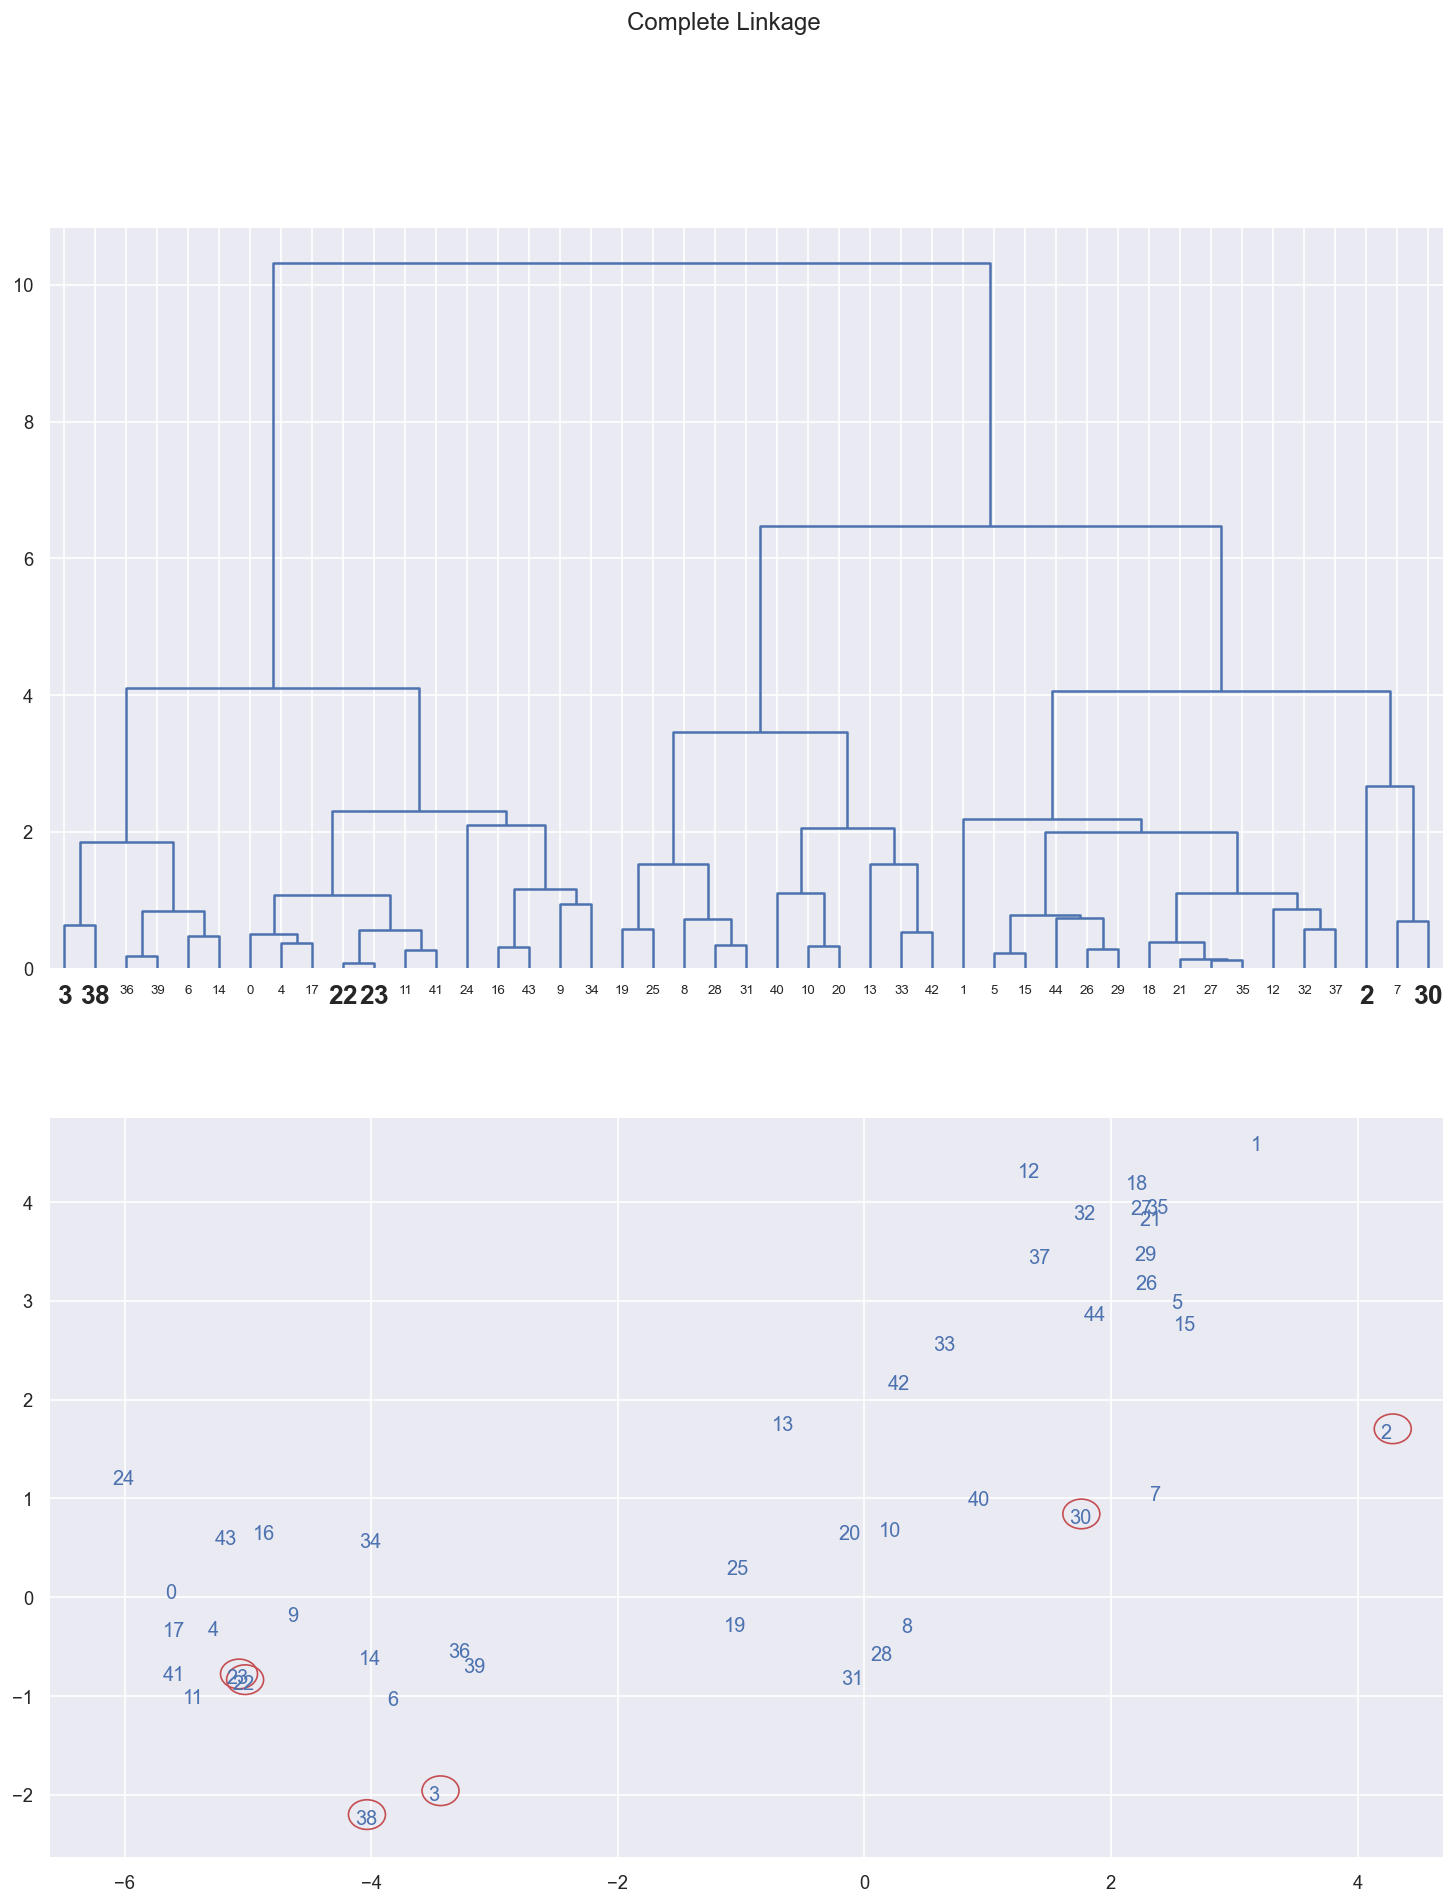

In [8]:
heir_scat_plot("Complete", points, highlight=[38,3,22,23,2,30])

In order to identifying clusters on the basis of a dendrogram we make a horizontal cut across it. The distinct sets of observations beneath the cut can be interpreted as clusters.

_"The height of the cut to the dendrogram serves the same role as the K in K-means clustering: it controls the number of clusters obtained."_

_"one single dendrogram can be used to obtain any number of clusters. In practice, people often look at the dendrogram and select by eye a sensible number of clusters, based on the heights of the fusion and the number of clusters desired...However, often the choice of where to cut the dendrogram is not so clear."_


---
Intro to stats learning

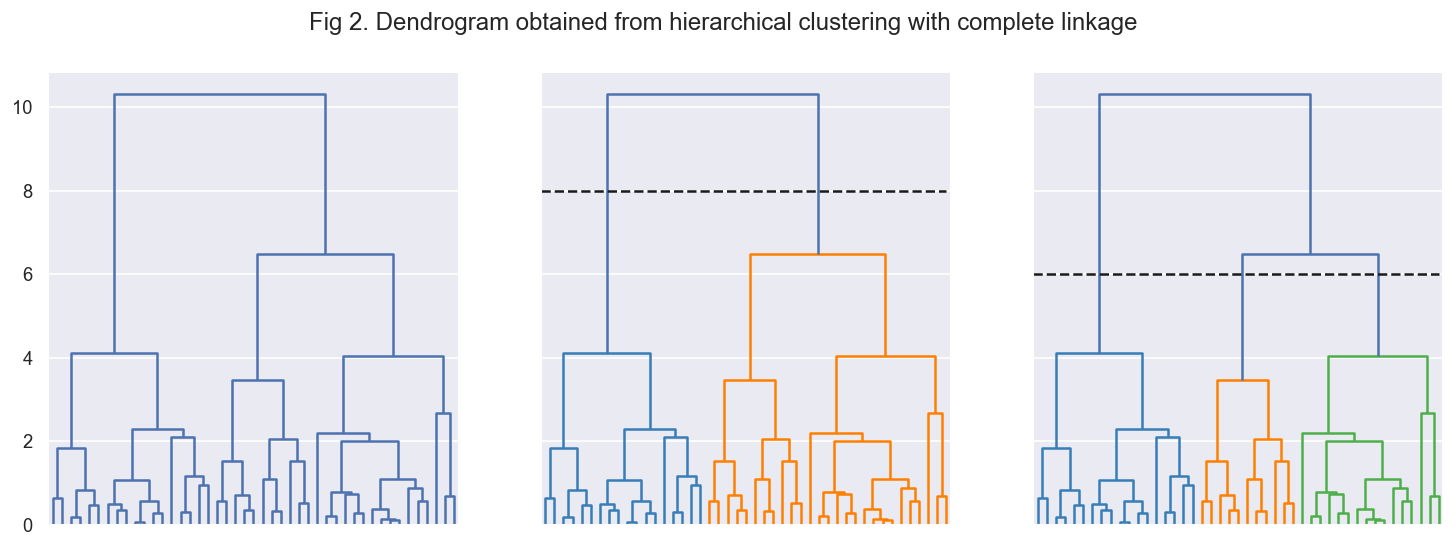

In [9]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)

axes = axes.flatten()

thesh_list = [0,8,6]

for i in range(3):
    
    plt.sca(axes[i])
    cluster = hierarchy.dendrogram(hierarchy.complete(points), ax=axes[i], color_threshold=thesh_list[i])
    axes[i].get_xaxis().set_ticks([])
    if thesh_list[i]:
        plt.hlines(thesh_list[i], xmin=0., xmax=pd.DataFrame(cluster['icoord']).max().max(), colors ='k', linestyles = 'dashed')
        
plt.suptitle("Fig 2. Dendrogram obtained from hierarchical clustering with complete linkage")
plt.show()

_"the dendrogram from the left-hand panel, cut at a height of nine (indicated by the dashed line). This cut results in two distinct clusters, shown in different colors. Right: the dendrogram from the left-hand panel, now cut at a height of five. This cut results in three distinct clusters, shown in different colors."_ Intro to stats learning

## The Hierarchical Clustering Algorithm

_"We begin by defining some sort of dissimilarity measure between each pair of observations. Most often, Euclidean distance is used"_

_"The algorithm proceeds iteratively. Starting out at the bottom of the dendrogram, each of the n observations is treated as its own cluster. The two clusters that are most similar to each other are then fused so that there now are n − 1 clusters. Next the two clusters that are most similar to each other are fused again, so that there now are n − 2 clusters. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and the dendrogram is complete."_

>1. Begin with n observations and a measure (such as Euclidean distance) of all the   (n2)=n(n−1)/2  pairwise dissimilarities. Treat each observation as its own cluster.
> 
> 2. For $i=n,n−1,\ldots,2$:
> 
>    (a) Examine all pairwise inter-cluster dissimilarities among the i clusters and identify the pair of clusters that are least dissimilar (that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the dendrogram at which the fusion should be placed.
>
>    (b) Compute the new pairwise inter-cluster dissimilarities among the i − 1 remaining clusters.

__TODO__
- Time allowing, do an animated version of Fig. 10.11 from intro to stats learning, showing the grouping step by step. Probably to make life easier color the numbered points as you go.
- Cant get the figure to change color for the final class... and I can't get the line between the two 

---
Intro to stats learning

In [299]:
from matplotlib import animation, rc
from IPython.display import HTML
from sklearn.cluster import KMeans

kclust = labelled_points[['x1', 'x2']]

def update_plot(i, kclust, dist_df, scat1, line1, final_colors, updated_colors):
    try:
    
        if i in [0,1]:
            # set 1 standard color
            scat1.set_array(updated_colors)
            line1.set_ydata([0])
            line1.set_xdata([0])
        else:
            if (i % 2) == 0:
                line1.set_ydata([0])
                line1.set_xdata([0])

                child_1 = dist_df['child_1'][int(i/2)-1]
                child_2 = dist_df['child_2'][int(i/2)-1]

                if child_1 < len(final_colors):
                    updated_colors[child_1]=final_colors[child_1]
                if child_2 < len(final_colors):
                    updated_colors[child_2]=final_colors[child_2]

                # changes color
                scat1.set_array(updated_colors)
            else:
                child_1 = dist_df['child_1'][int(i-1/2)-2]
                child_2 = dist_df['child_2'][int(i-1/2)-2]
                if child_1 < len(final_colors) and child_2 < len(final_colors):
                    print('here')
                    line1.set_xdata([kclust['x1'][child_1]])
                    line1.set_ydata([kclust['x2'][child_2]])
                # else - you'll have to work out the line to the average of the cluster which may be tricky
                    
    except:
        print(i)
                
    
    return scat1,

def heir_vis(n_clusters=3, random_state=1):
  
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average', compute_distances =True)
    cluster.fit(points)

    dist_df = pd.DataFrame(cluster.children_,cluster.distances_).reset_index()
    dist_df.columns = ["distances", "child_1", "child_2"]

    final_colors = cluster.labels_
    updated_colors = np.array([n_clusters+1]*len(final_colors))

    fig = plt.figure(figsize =(5,5))

    scat1 = plt.scatter(kclust['x1'], kclust['x2'], c=final_colors, cmap=plt.cm.tab10, alpha=0.7)
    line1, = plt.plot([],[])
    ani = animation.FuncAnimation(fig, update_plot, 
                                  frames=range((len(dist_df)*2)-2),
                                  fargs=(kclust, dist_df, scat1, line1, final_colors, updated_colors),
                                  interval=100,
                                 )

    plt.close()
    # Note: below is the part which makes it work on Colab
    rc('animation', html='jshtml')
    return ani

In [300]:
heir_vis()

here
here
here
here
here
here
here
here
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85


In [166]:
make_ani()

ValueError: Collections can only map rank 1 arrays

<Figure size 1200x1200 with 1 Axes>

In [ ]:
numbered_scatter(points)
plt.

## Dissimilarity Measure

_"The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. This extension is achieved by developing the notion of linkage, which defines the dissimilarity between two groups of observations. The four most common types of linkage—complete, average, single, and centroid—are briefly described in Table 10.2. Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms."_

__TODO__
- add in information from table in Intro to stats learning
- Diagram to demonstrate the other two linkages as well

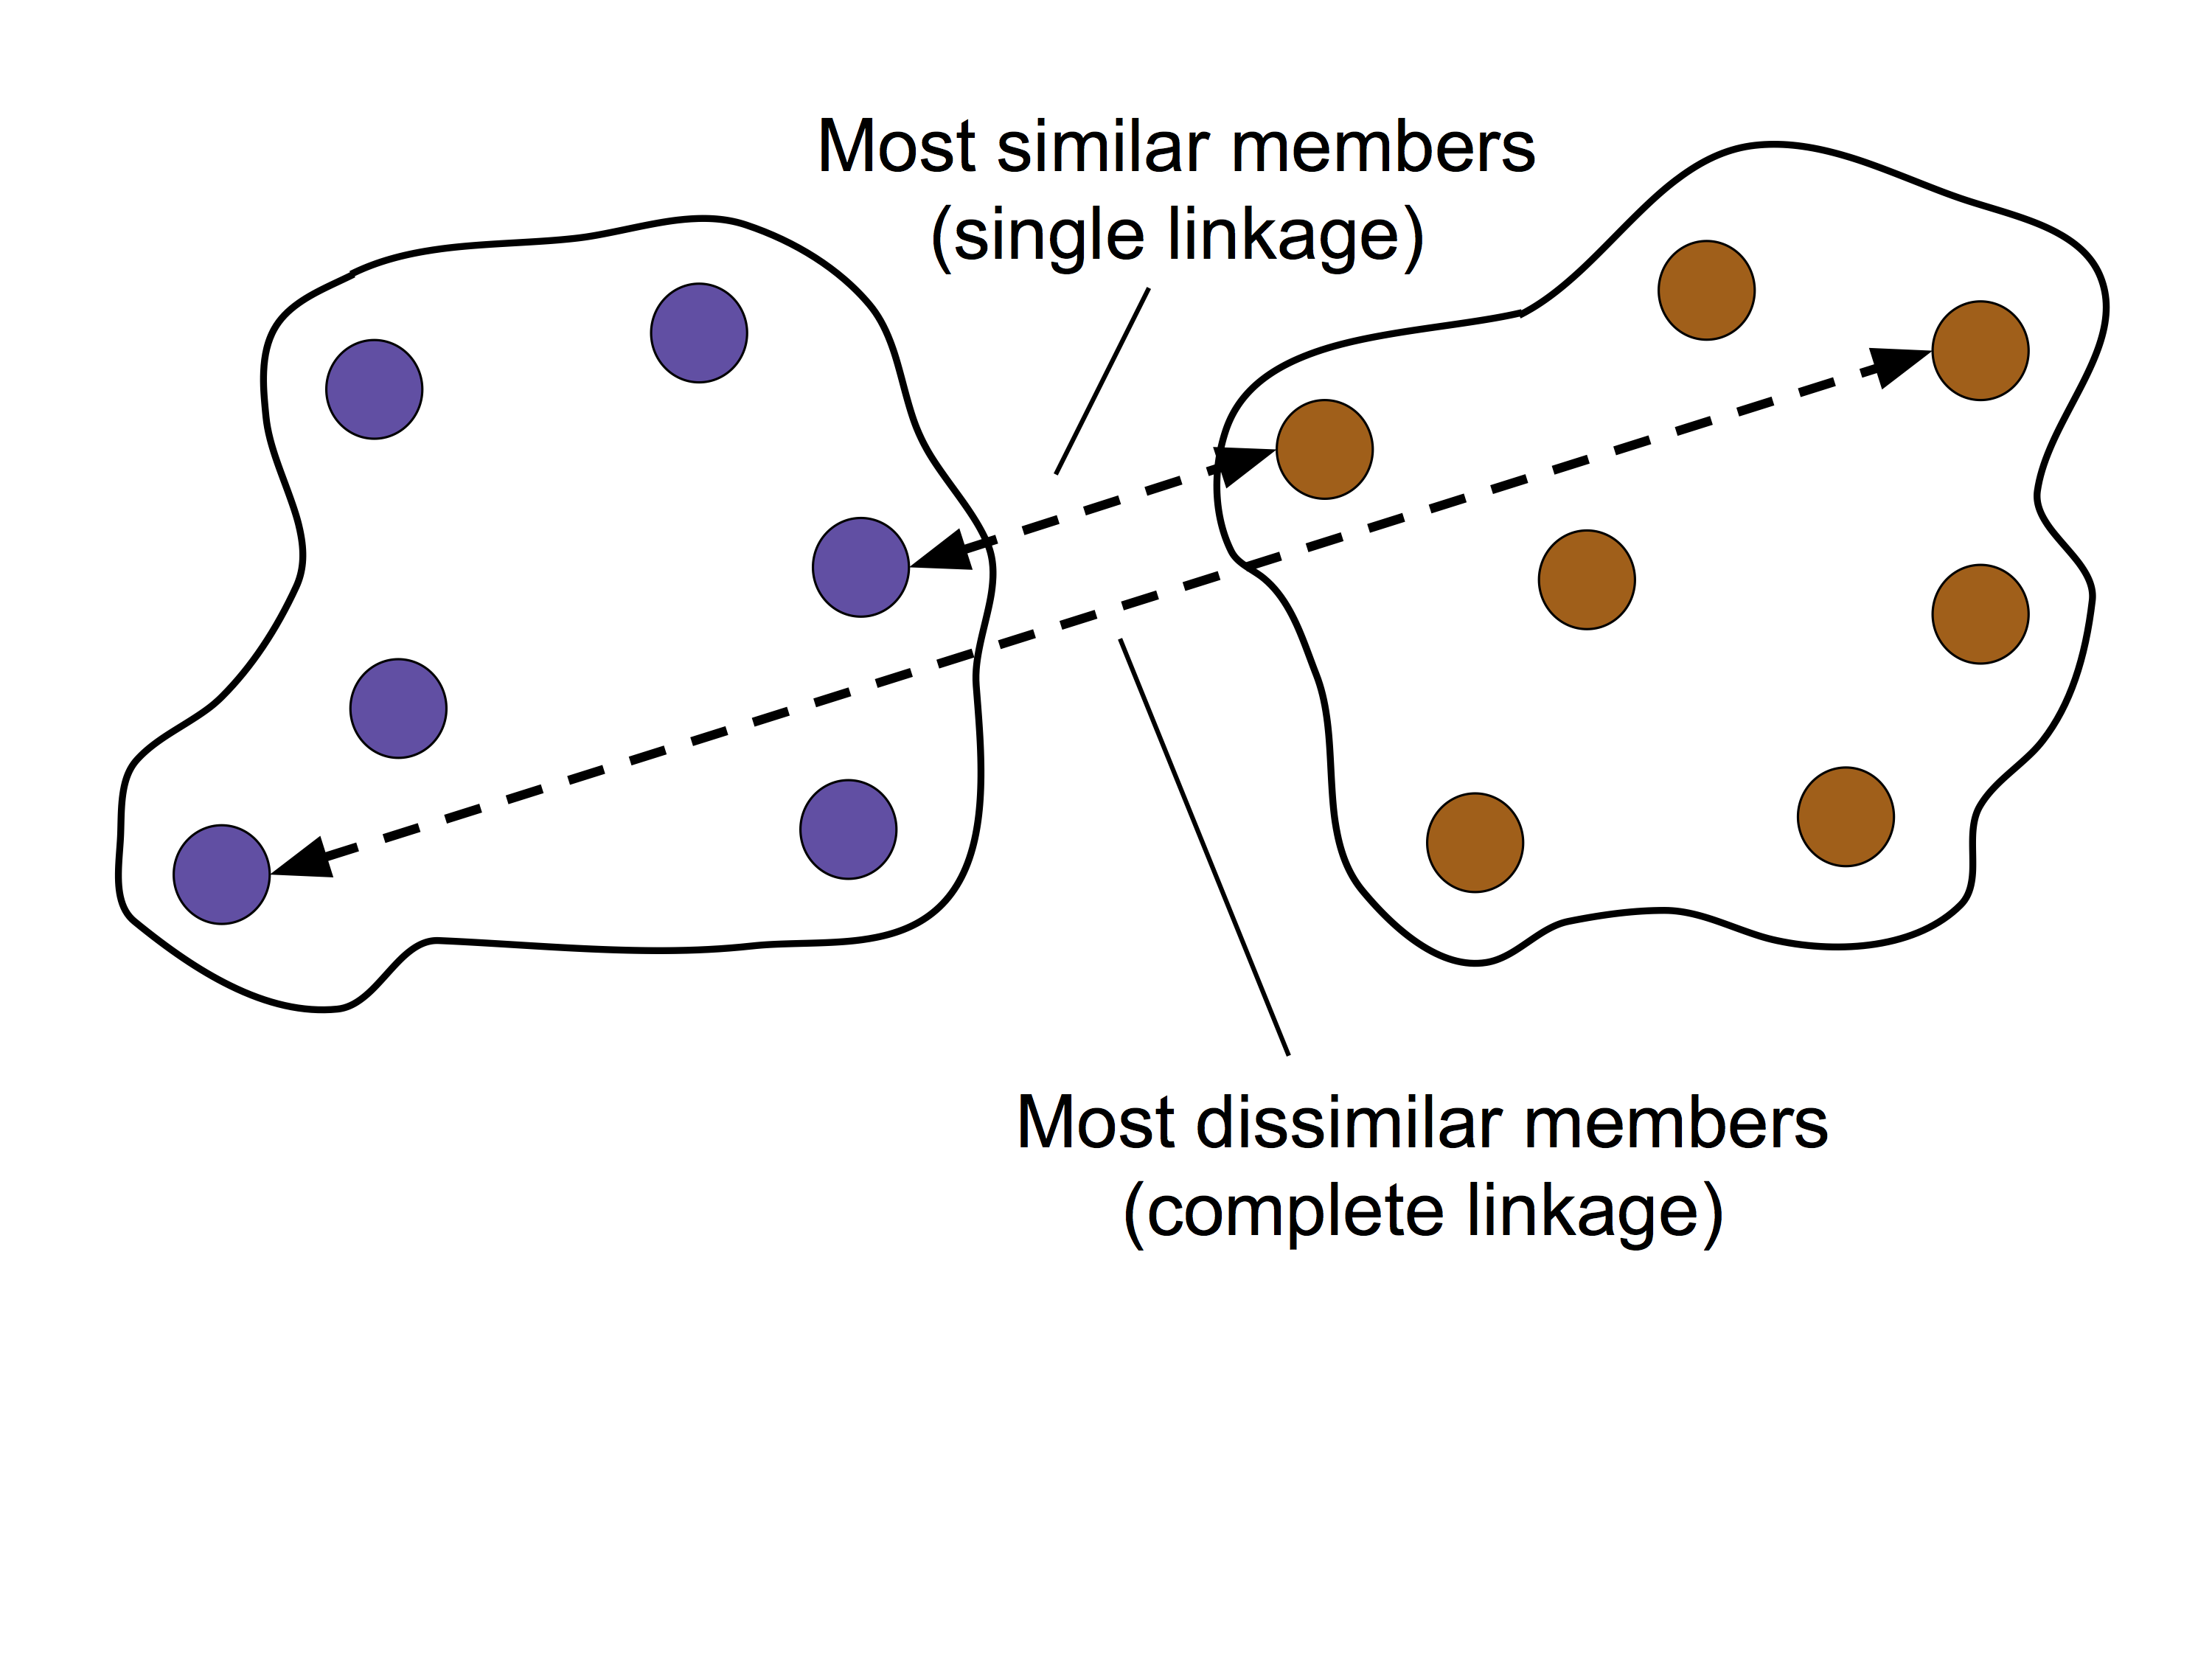

In [11]:
# https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb
Image(filename='11_07.png', width=400)

_"Average and complete linkage tend to yield more balanced clusters."_ Intro to stats learning

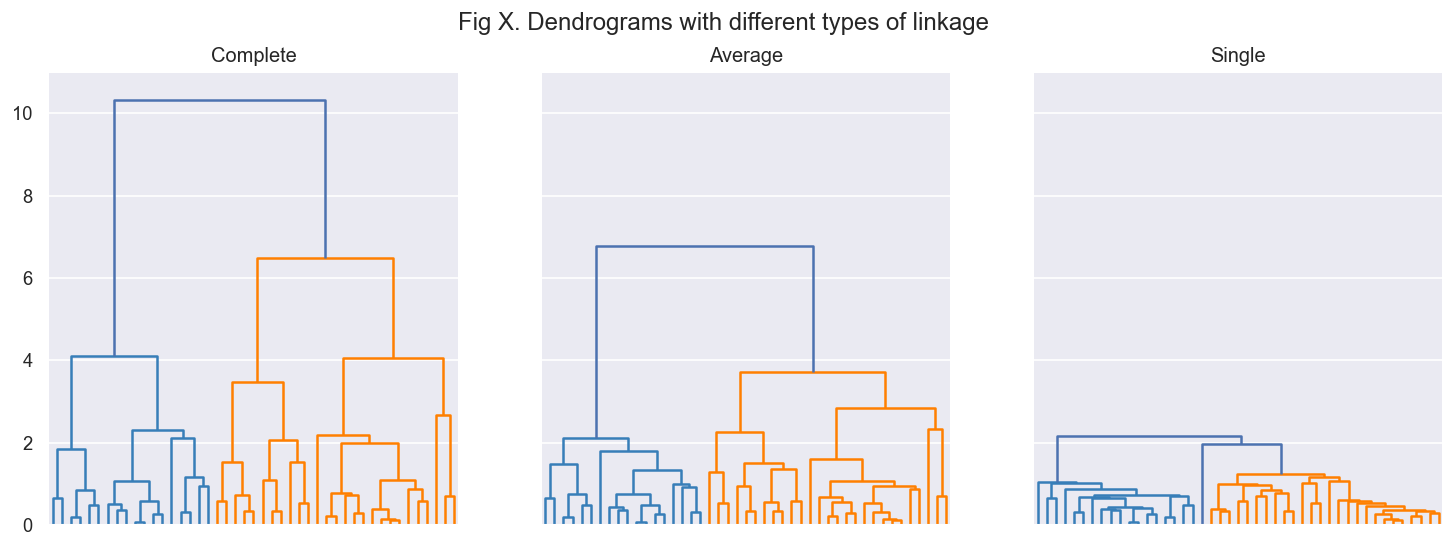

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)

axes = axes.flatten()

for i, (links, title) in enumerate(zip([hierarchy.complete(points), hierarchy.average(points), hierarchy.single(points)],
                                       ["Complete", "Average", "Single"])):
    
    plt.sca(axes[i])
    cluster = hierarchy.dendrogram(links, ax=axes[i])
    axes[i].get_xaxis().set_ticks([])
    plt.title(title)
        
plt.ylim(0,11)
plt.suptitle("Fig X. Dendrograms with different types of linkage")
plt.show()

__TODO__
- continue from "Choice of Dissimilarity Measure" in An introduction to statistical learning

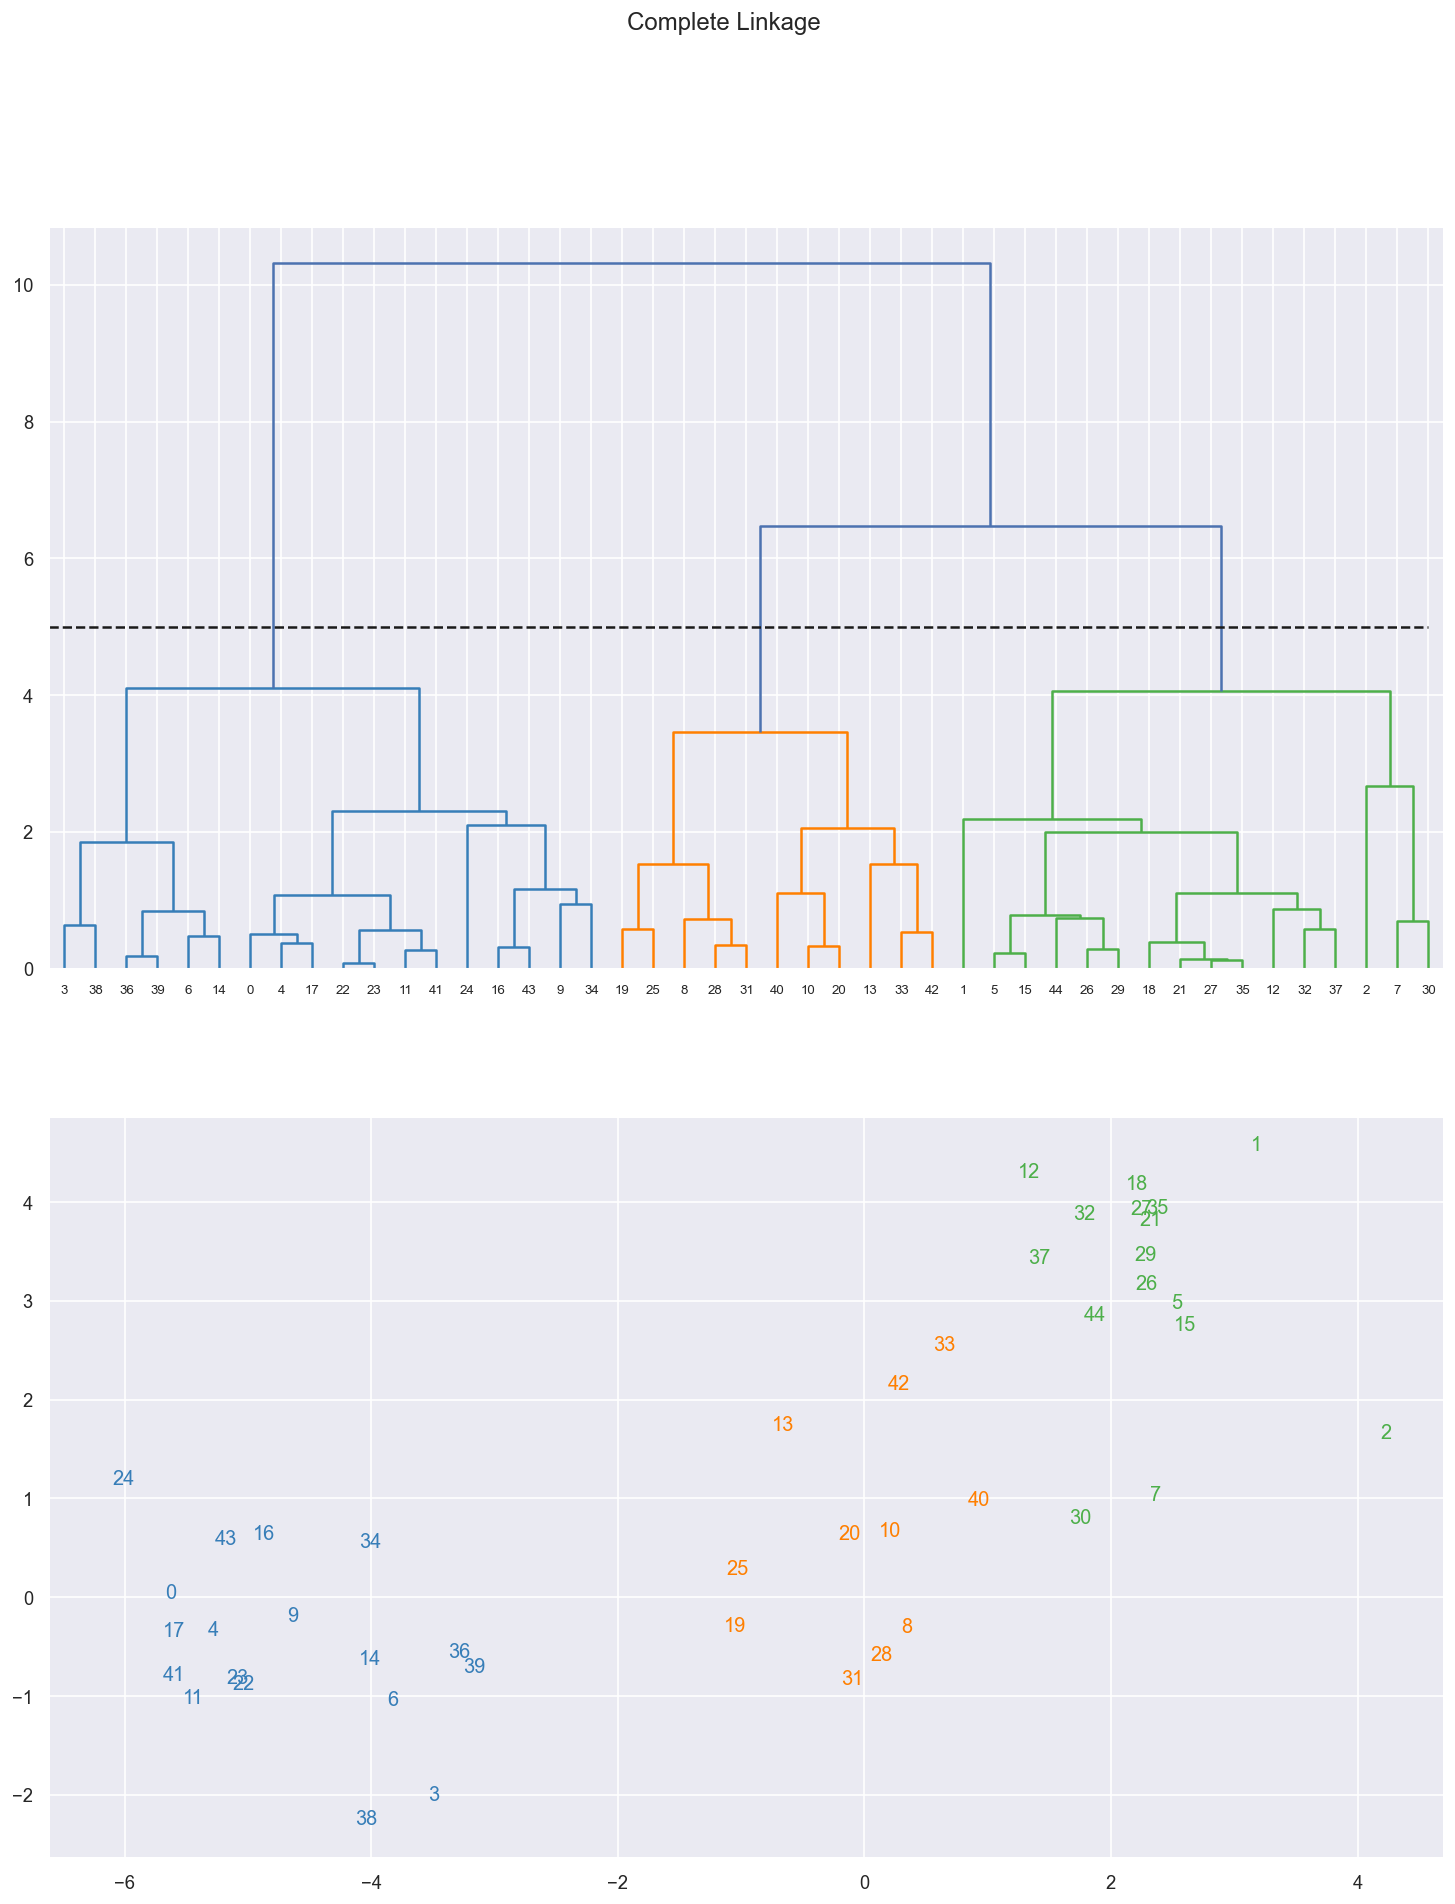

In [19]:
heir_scat_plot("Complete", points, threshold=5)

## Limitations
_"The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height. However, on an arbitrary data set, this assumption of hierarchical structure might be unrealistic. For instance, suppose that our observations correspond to a group of people with a 50–50 split of males and females, evenly split among Americans, Japanese, and French. We can imagine a scenario in which the best division into two groups might split these people by gender, and the best division into three groups might split them by nationality. In this case, the true clusters are not nested, in the sense that the best division into three groups does not result from taking the best division into two groups and splitting up one of those groups. Consequently, this situation could not be well-represented by hierarchical clustering. Due to situations such as this one, hierarchical clustering can sometimes yield worse (i.e. less accurate) results than K-means clustering for a given number of clusters."_ Intro to stats learning

__TODO__
- Use more stuff from here: https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb

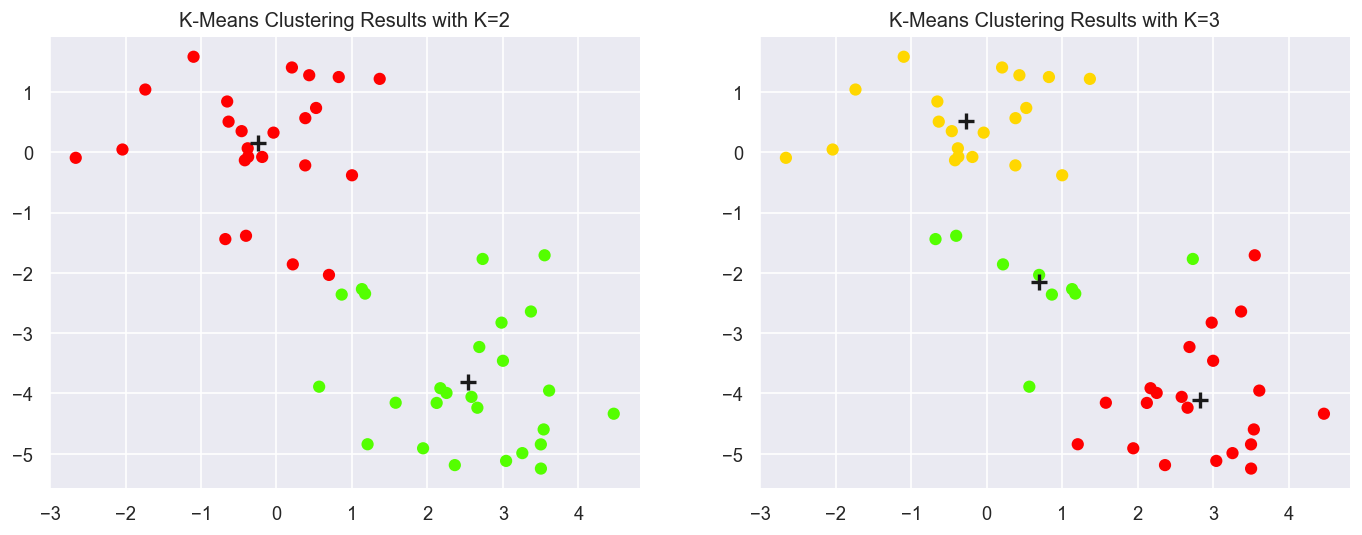

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);